In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Charger le fichier JSON
file_path = 'cleaned_articles_fr.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df = pd.DataFrame(data)
df

,title,description,content,lemmatized_text,diseases,vaccines,treatments
0,demarrage lepidemie bronchiolite metropole lil...,enfants ans vus urgences atteints dune bronchi...,lepidemie annuelle bronchiolite maladie danger...,demarrage lepidemie bronchiolite metropole lil...,[],[],[]
1,coronavirus conditions indemniser maladie prof...,cour constitutionnelle invalide jeudi conditio...,maisons repos retenu lecons covid choses quon ...,coronavirus condition indemniser maladie profe...,[],[],[]
2,doute mort reboot film blade,disney marvel repousse reboot film blade date ...,disney marvel repousse reboot film blade date ...,doute mourir reboot film blade disney marvel r...,[],[],[]
3,donald trump role veut donner kennedy jr cas v...,donald trump promet donner robert kennedy jr p...,etatsunis promesse inquietante scrutin novembr...,donald trump rol vouloir donner kennedy jr cas...,[],[],[]
4,retard er vol commercial dariane malheureuse l...,vol inaugural dariane survenu lete fin lannee ...,vol inaugural dariane survenu lete fin lannee ...,retard er vol commercial dariane malheureux la...,[],[],[]
...,...,...,...,...,...,...,...
58,academie francaise definitions fausses fellati...,mercredi lacademie francaise sorti neuvieme di...,mercredi lacademie francaise devoile neuvieme ...,academie francais definition faux fellation cu...,[],[],[]
59,aligner jours carence fonction publique prive ...,aligner delai carence public prive mesure levi...,aligner delai carence public prive propose gou...,aligner jour carencer fonction public prive me...,[],[],[]
60,robert kennedy jr tete sante americaine nouvel...,donald trump annonce quil donnerait carte blan...,robert kennedy jr aider lamerique bonne sante ...,robert kennedy jr tete sante americaine nouvea...,[],[],[]
61,enjeux critiques planete reelection donald tru...,environnement technologie sante geopolitique d...,environnement technologie sante geopolitique d...,enjeux critique planete reelection donald trum...,[],[],[]


## Cleaned_articles (Anglais)

In [4]:
# Charger le fichier JSON
file_path = 'cleaned_articles_en.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df_en = pd.DataFrame(data)
df_en

,title,description,content,lemmatized_text,diseases,vaccines,treatments
0,trio charged suspected international ppe fraud,trio includ husband wife charged national crim...,people includ husband wife appeared court char...,trio charge suspect international ppe fraud tr...,[],[],[]
1,coronavirus defeats innate immune response,sarscov enzyme counteract cells innate defense...,coronavirus sarscov enzyme counteract cells in...,coronavirus defeat innate immune response sars...,[],[],[]
2,people liv pain covid emerged,chronic pain increased adults rise sedentary l...,covid restrictions helped stem sarscov consequ...,people liv pain covid emerge chronic pain incr...,[],[],[]
3,watch terrify moment dog walker narrowly avoid...,bystander footage captured terrify moment clif...,russia texas school shoot abortion rights amer...,watch terrify moment dog walker narrowly avoid...,[],[],[]
4,watch father flies country paint mural grandchild,mark hendron traveled delaware california epic...,russia texas school shoot abortion rights amer...,watch father fly country paint mural grandchil...,[],[],[]
...,...,...,...,...,...,...,...
95,remdesivir papers faucis covid drug choice kil...,military whistleblower dropped socalled remdes...,military whistleblower dropped socalled remdes...,remdesivir paper faucis covid drug choice kill...,[],[],[]
96,dmso ivermectinlike miracle solution strokes n...,miracle remedy light independent media referr ...,miracle remedy light independent media referr ...,dmso ivermectinlike miracle solution stroke ne...,[],[],[]
97,white house legalizes gainoffunction build bio...,regime joe biden kamala harris revealed illega...,regime joe biden kamala harris revealed illega...,white house legalize gainoffunction build biow...,[],[],[]
98,san francisco transit workers fired refusing c...,employees san francisco bay rapid transit bart...,employees san francisco bay rapid transit bart...,san francisco transit worker fire refuse covid...,[],[],[]


## Cleaned_articles  (Arabic)

In [5]:
# Charger le fichier JSON
file_path = 'cleaned_articles_ar.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df_ar = pd.DataFrame(data)
df_ar

,title,description,content,lemmatized_text,diseases,vaccines,treatments
0,منهم لاعبة اصل مغربي يجني محترفو العاب الفيديو...,ادت جايحة فيروس كورونا تسريع عالم العاب الفيدي...,league of legends pewdiepie ninja shroud xqc s...,,[],[],[]
1,تدابير مهمة لامان الدفع بالهاتف الذكي,شهدت السنوات وخاصة جايحة كورونا زيادة ملحوظة ا...,tan bluetooth nfc wifi sim,,[],[],[]
2,محكمة تقر دولار لموظفة فصلت لرفضها لقاح كورونا,قررت منح هيية محلفين فيدرالية امريكية منح دولا...,httpssarabicaehtml httpscdnimgsarabicaeimgefxd...,,[],[],[]
3,المدن الكبرى الكندية تشهد انخفاضا اسعار الايجا...,الاهرام الكندي تورنتو نشرت rentalsca تقريرها ن...,rentalsca rentalsca,,[],[],[]


In [6]:
df.describe

<bound method NDFrame.describe of                                                 title  \
0   demarrage lepidemie bronchiolite metropole lil...   
1   coronavirus conditions indemniser maladie prof...   
2                        doute mort reboot film blade   
3   donald trump role veut donner kennedy jr cas v...   
4   retard er vol commercial dariane malheureuse l...   
..                                                ...   
58  academie francaise definitions fausses fellati...   
59  aligner jours carence fonction publique prive ...   
60  robert kennedy jr tete sante americaine nouvel...   
61  enjeux critiques planete reelection donald tru...   
62  dealers femmes voilees accuses casseurs lusage...   

                                          description  \
0   enfants ans vus urgences atteints dune bronchi...   
1   cour constitutionnelle invalide jeudi conditio...   
2   disney marvel repousse reboot film blade date ...   
3   donald trump promet donner robert kennedy jr p...

In [7]:
df_en.describe

<bound method NDFrame.describe of                                                 title  \
0      trio charged suspected international ppe fraud   
1          coronavirus defeats innate immune response   
2                       people liv pain covid emerged   
3   watch terrify moment dog walker narrowly avoid...   
4   watch father flies country paint mural grandchild   
..                                                ...   
95  remdesivir papers faucis covid drug choice kil...   
96  dmso ivermectinlike miracle solution strokes n...   
97  white house legalizes gainoffunction build bio...   
98  san francisco transit workers fired refusing c...   
99  idaho health board defies government edicts re...   

                                          description  \
0   trio includ husband wife charged national crim...   
1   sarscov enzyme counteract cells innate defense...   
2   chronic pain increased adults rise sedentary l...   
3   bystander footage captured terrify moment clif...

In [8]:
df_ar.describe

<bound method NDFrame.describe of                                                title  \
0  منهم لاعبة اصل مغربي يجني محترفو العاب الفيديو...   
1              تدابير مهمة لامان الدفع بالهاتف الذكي   
2     محكمة تقر دولار لموظفة فصلت لرفضها لقاح كورونا   
3  المدن الكبرى الكندية تشهد انخفاضا اسعار الايجا...   

                                         description  \
0  ادت جايحة فيروس كورونا تسريع عالم العاب الفيدي...   
1  شهدت السنوات وخاصة جايحة كورونا زيادة ملحوظة ا...   
2  قررت منح هيية محلفين فيدرالية امريكية منح دولا...   
3  الاهرام الكندي تورنتو نشرت rentalsca تقريرها ن...   

                                             content  \
0  league of legends pewdiepie ninja shroud xqc s...   
1                         tan bluetooth nfc wifi sim   
2  httpssarabicaehtml httpscdnimgsarabicaeimgefxd...   
3                                rentalsca rentalsca   

                              lemmatized_text diseases vaccines treatments  
0                                             

## Histogramme de Longeur des titres (Frensh)

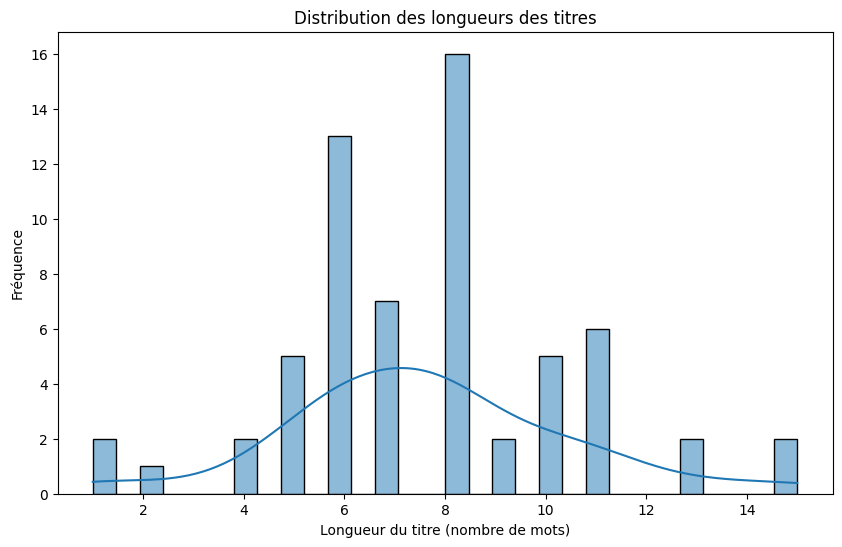

In [9]:
# Calcul de la longueur des titres
df['title_length'] = df['title'].apply(lambda x: len(x.split()))

# Histogramme de la longueur des titres
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], kde=True, bins=30)
plt.title("Distribution des longueurs des titres")
plt.xlabel("Longueur du titre (nombre de mots)")
plt.ylabel("Fréquence")
plt.show()

## Histogramme de Longeur des titres (Anglais)

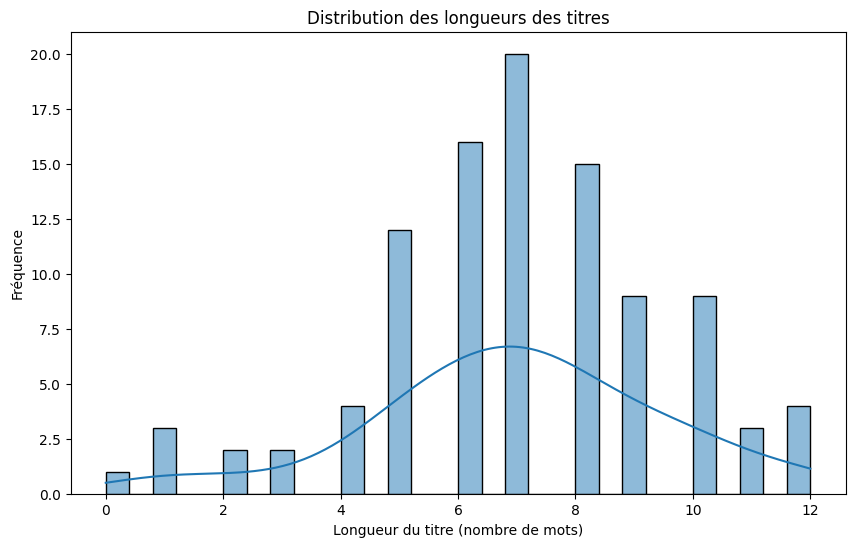

In [10]:
# Calcul de la longueur des titres
df_en['title_length'] = df_en['title'].apply(lambda x: len(x.split()))

# Histogramme de la longueur des titres
plt.figure(figsize=(10, 6))
sns.histplot(df_en['title_length'], kde=True, bins=30)
plt.title("Distribution des longueurs des titres")
plt.xlabel("Longueur du titre (nombre de mots)")
plt.ylabel("Fréquence")
plt.show()

## Histogramme de Longeur des titres (Arabic)

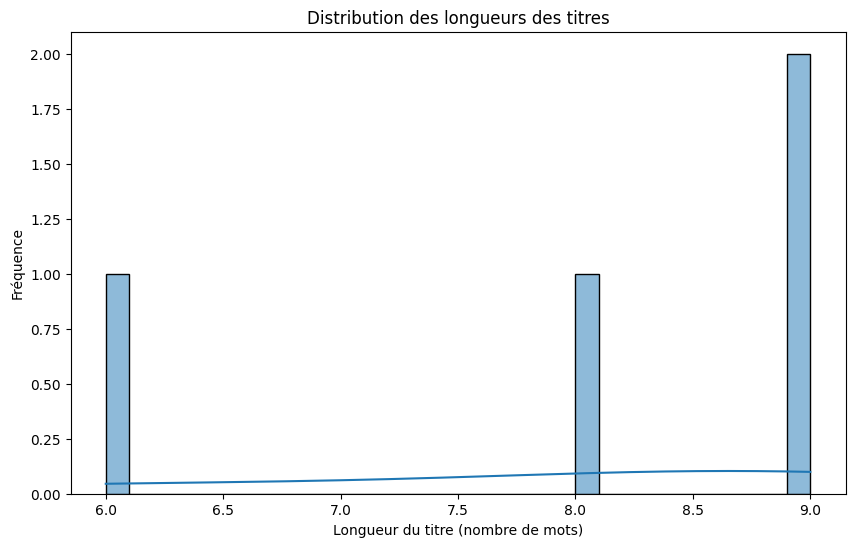

In [11]:
# Calcul de la longueur des titres
df_ar['title_length'] = df_ar['title'].apply(lambda x: len(x.split()))

# Histogramme de la longueur des titres
plt.figure(figsize=(10, 6))
sns.histplot(df_ar['title_length'], kde=True, bins=30)
plt.title("Distribution des longueurs des titres")
plt.xlabel("Longueur du titre (nombre de mots)")
plt.ylabel("Fréquence")
plt.show()

## Analyse des mots  (FRENSH)

In [12]:
# Analyser la fréquence des termes dans les titres
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df['title'])

# Afficher les mots les plus fréquents
frequent_terms = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(frequent_terms.sum().sort_values(ascending=False).head(20))

trump             9
donald            8
premiere          5
vaccin            4
lantwerp          4
monde             4
americaine        3
presidentielle    3
sante             3
retourne          3
rappels           3
prets             3
poutine           3
complotistes      3
maladie           3
kennedy           3
jr                3
francaise         3
dune              3
vladimir          3
dtype: int64


## Analyse des mots  (ANGLAIS)

In [13]:
# Analyser la fréquence des termes dans les titres
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df_en['title'])

# Afficher les mots les plus fréquents
frequent_terms = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(frequent_terms.sum().sort_values(ascending=False).head(20))

watch         30
covid         18
trump          9
government     6
vaccines       6
halloween      5
harris         5
house          4
vaccine        4
win            4
dog            4
dr             4
health         4
injections     4
rfk            4
birx           3
mrna           3
build          3
city           3
york           3
dtype: int64


## Analyse des mots  (ARABIC)

In [14]:
# Analyser la fréquence des termes dans les titres
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df_ar['title'])

# Afficher les mots les plus fréquents
frequent_terms = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(frequent_terms.sum().sort_values(ascending=False).head(20))

اسعار      1
انخفاضا    1
مغربي      1
مرة        1
محكمة      1
محترفو     1
لموظفة     1
لقاح       1
لرفضها     1
لاول       1
لامان      1
لاعبة      1
كورونا     1
فصلت       1
دولار      1
تقر        1
تشهد       1
تدابير     1
بالهاتف    1
منهم       1
dtype: int64


## Boxplot des Longeurs (FRENSH)

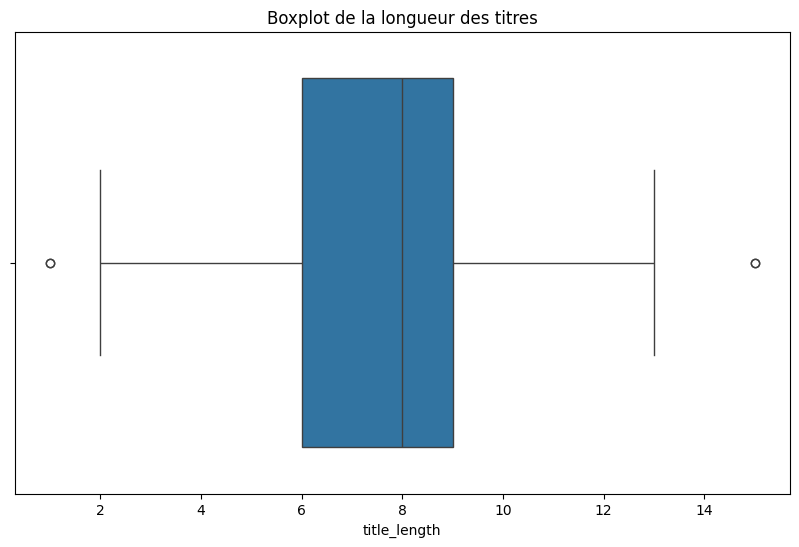

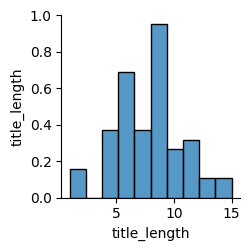

In [15]:
# Boxplot des longueurs de texte
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['title_length'])
plt.title("Boxplot de la longueur des titres")
plt.show()

# Pairplot pour examiner les relations entre les variables numériques
sns.pairplot(df[['title_length']])  # Ajouter d'autres variables numériques ici si nécessaire
plt.show()

## Boxplot des Longeurs (ANGLAIS)

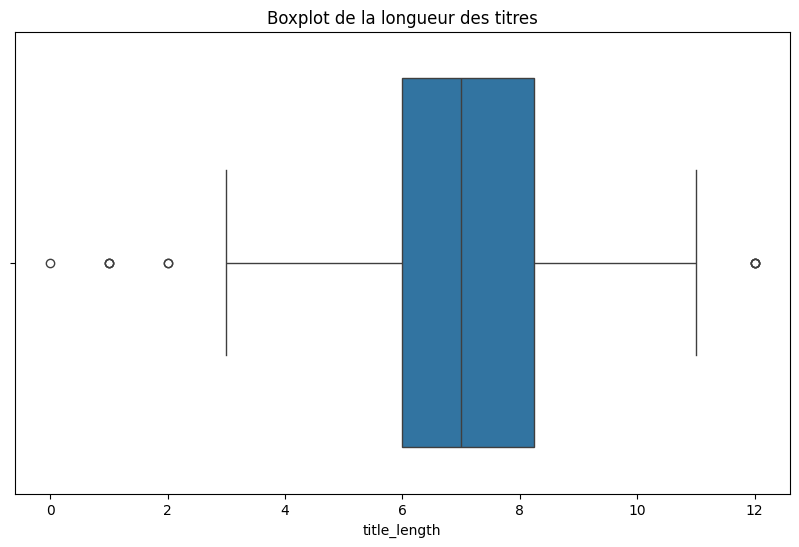

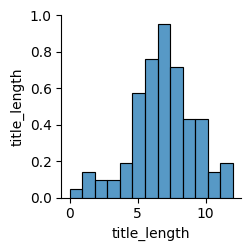

In [16]:
# Boxplot des longueurs de texte
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_en['title_length'])
plt.title("Boxplot de la longueur des titres")
plt.show()

# Pairplot pour examiner les relations entre les variables numériques
sns.pairplot(df_en[['title_length']])  # Ajouter d'autres variables numériques ici si nécessaire
plt.show()

## Boxplot des Longeurs (ARABIC)

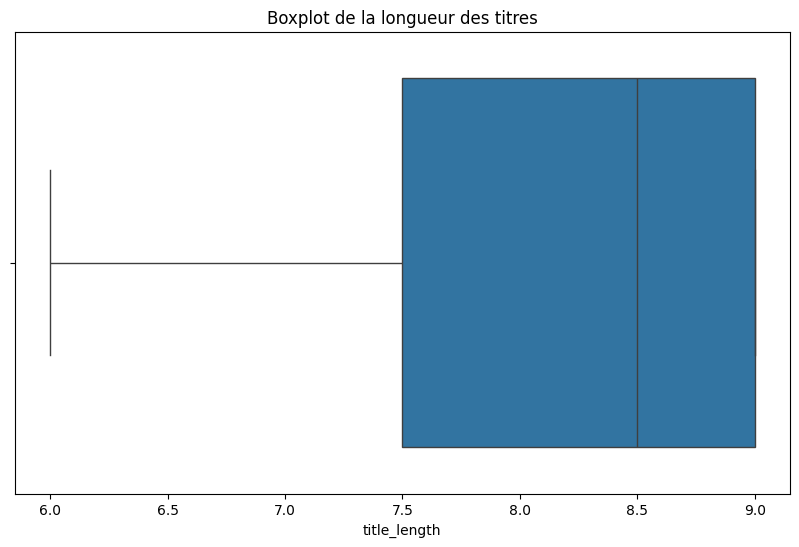

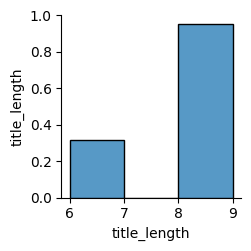

In [17]:
# Boxplot des longueurs de texte
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ar['title_length'])
plt.title("Boxplot de la longueur des titres")
plt.show()

# Pairplot pour examiner les relations entre les variables numériques
sns.pairplot(df_ar[['title_length']])  # Ajouter d'autres variables numériques ici si nécessaire
plt.show()

## Nuage des mots (FRENSH)

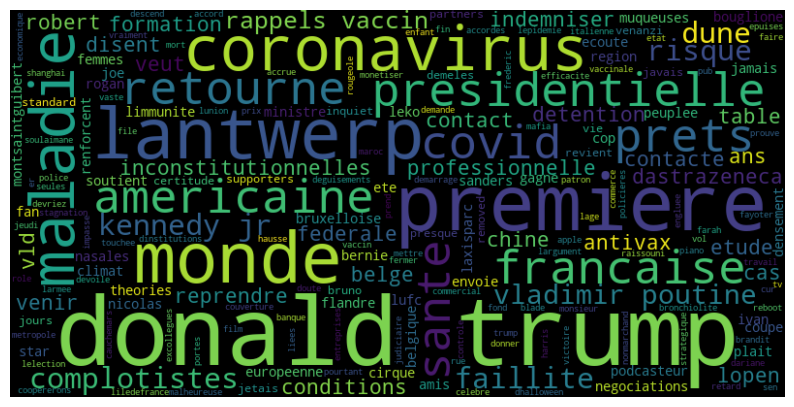

In [18]:
from wordcloud import WordCloud

# Générer le nuage de mots à partir des titres
wordcloud = WordCloud(stopwords='english', width=800, height=400).generate(' '.join(df['title']))

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Nuage des mots (ANGLAIS)

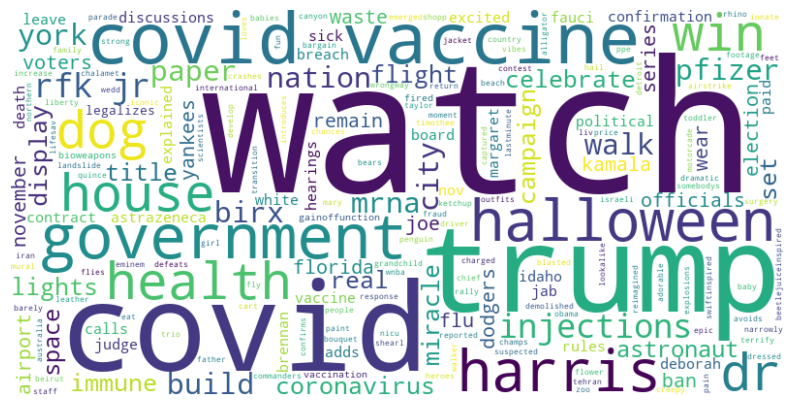

In [19]:
from wordcloud import WordCloud

# Générer le nuage de mots à partir des titres
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(df_en['title']))

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Nuage des mots (ARABIC)

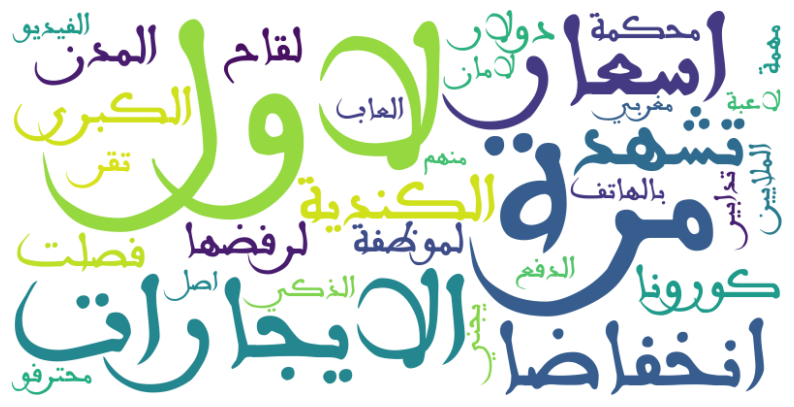

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Préparer les titres en arabe
titles_ar = ' '.join(df_ar['title'])

# Reshaper le texte arabe pour une ligature correcte
reshaped_text = arabic_reshaper.reshape(titles_ar)

# Inverser le texte pour l'affichage correct de droite à gauche
bidi_text = get_display(reshaped_text)

# Générer le nuage de mots
font_path = r"C:\Users\hp\AppData\Local\Microsoft\Windows\Fonts\maghribi-font 2.ttf"
wordcloud = WordCloud( background_color='white',width=800,height=400,font_path=font_path).generate(bidi_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [21]:
import gensim
from gensim.models import FastText
from gensim.models.fasttext import FastText as FT
from gensim.models import Word2Vec

# Tokeniser les tweets pour entraîner le modèle
tokenized_titles = [title.split() for title in df['title']]

# Entraîner un modèle Word2Vec
model_w2v = Word2Vec(sentences=tokenized_titles, vector_size=300, window=5, min_count=1, workers=4)

# Sauvegarder le modèle
model_w2v.save("word2vec_model")

# Extraire un vecteur de mots
word_vector = model_w2v.wv['vaccin']
print(word_vector)


[-2.3965174e-03  1.4316662e-03  7.2241423e-04  2.4830522e-03
 -1.6348575e-03 -1.5371288e-03 -2.0289200e-03  1.1547921e-03
 -1.5008126e-03  2.8247593e-03 -1.4438136e-03 -3.0505869e-03
 -1.5885308e-03  2.1418259e-03 -2.1390100e-03 -1.7609872e-03
 -2.4295617e-03  2.0324218e-03  1.1285037e-03  9.6561125e-04
 -1.0620087e-03  2.0191509e-03 -2.0434284e-03 -6.7216950e-04
 -1.9741107e-03 -3.2890786e-04 -7.0111640e-04  2.8307717e-03
  2.8626066e-05 -2.8893899e-03 -1.7996298e-03 -2.2964363e-03
  9.1431272e-04  3.1736875e-03 -1.9358132e-03  2.7727960e-03
  2.8584332e-03 -2.3711910e-03 -2.9682550e-03  3.1626639e-03
  2.7743517e-03 -1.5547801e-03 -2.2380026e-03  2.5989870e-03
  1.2704262e-03  2.7185162e-03 -2.5153561e-03 -3.1793276e-03
  5.1920011e-04 -3.2611557e-03 -1.6256899e-03 -1.1595258e-03
  3.2097956e-03  2.8844895e-03 -9.6117530e-04  1.9689708e-03
  2.7582718e-03 -7.4991747e-04  3.1728451e-03  2.3855339e-03
  6.7753036e-04 -1.2984941e-03 -1.6904135e-03 -1.0130232e-03
  2.6293804e-03 -2.07419

In [22]:
similarity = model_w2v.wv.similarity('vaccin', 'covid')
print(f"Similarité entre 'vaccin' et 'covid': {similarity}")


Similarité entre 'vaccin' et 'covid': 0.03249426931142807


Shape of word_vectors: (20, 300)


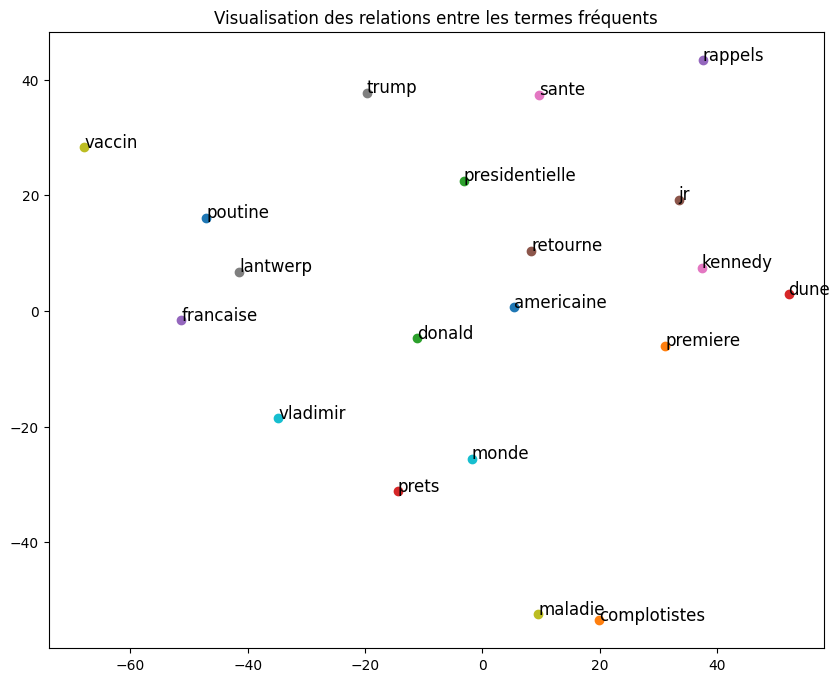

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que df['title'] contient les titres de vos documents.
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df['title'])

# Extraire les mots les plus fréquents
frequent_terms = vectorizer.get_feature_names_out()

# Extraire les vecteurs de mots pour les mots fréquents
word_vectors = [model_w2v.wv[word] for word in frequent_terms if word in model_w2v.wv]

# Convertir les vecteurs en tableau numpy
word_vectors = np.array(word_vectors)

# Vérifier la forme des vecteurs de mots
print("Shape of word_vectors:", word_vectors.shape)

# Appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=300, n_iter_without_progress=100)
tsne_results = tsne.fit_transform(word_vectors)

# Visualiser avec matplotlib
plt.figure(figsize=(10, 8))
for i, word in enumerate(frequent_terms):  # Utiliser uniquement les mots les plus fréquents
    if word in model_w2v.wv:  # Afficher seulement les mots présents dans le vocabulaire
        plt.scatter(tsne_results[i, 0], tsne_results[i, 1])
        plt.text(tsne_results[i, 0], tsne_results[i, 1], word, fontsize=12)
plt.title("Visualisation des relations entre les termes fréquents")
plt.show()


In [24]:
# Tokeniser les tweets pour entraîner le modèle
tokenized_titles = [title.split() for title in df_ar['title']]

# Entraîner un modèle Word2Vec
model_w2v = Word2Vec(sentences=tokenized_titles, vector_size=300, window=5, min_count=1, workers=4)

# Sauvegarder le modèle
model_w2v.save("word2vec_model")

# Extraire un vecteur de mots
word_vector = model_w2v.wv['لقاح']
print(word_vector)

[-2.81946943e-03  2.15531304e-03 -1.92966661e-03 -5.83249319e-04
  3.25237110e-04 -6.27016241e-04 -3.04108066e-03  1.32789533e-03
 -2.19035707e-03 -2.93048867e-03  1.30389095e-03 -2.53245438e-04
  2.17019394e-03 -2.33801967e-03  2.60001019e-04 -2.28790042e-04
  1.91438792e-03 -3.24355322e-03  1.97678478e-03 -2.99321092e-03
 -2.59456434e-03  2.42588911e-04 -8.87898612e-04 -1.29738532e-03
 -1.76772708e-03  1.37026038e-03 -3.10825743e-03  3.95243173e-04
  1.40262803e-03 -9.36182332e-05 -1.65770456e-04  2.38913414e-03
 -3.18943779e-03 -3.00430413e-03  1.48039020e-03  2.90553248e-03
 -2.59845890e-03 -2.76982272e-03 -2.14048225e-04 -3.01196938e-03
  7.06859457e-04  3.07844928e-03 -2.03857152e-03 -2.25218385e-03
  2.97083659e-03 -2.53269274e-04 -1.24801521e-03 -9.03647335e-04
 -2.91707879e-03 -1.54251617e-03 -1.38431031e-03  8.28794655e-05
  2.30184392e-04  2.54180003e-03  2.27567623e-03 -5.04561642e-04
 -3.32577224e-03  8.64808564e-04 -2.03748932e-03  3.03595699e-03
  1.26824097e-03 -3.35305

Shape of word_vectors: (20, 300)


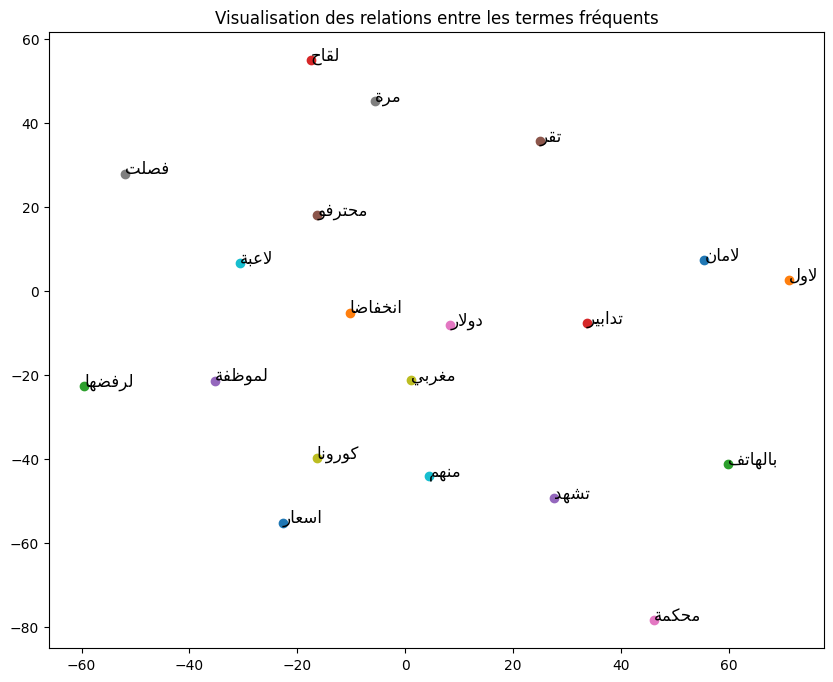

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display

# Assurez-vous que df_ar['title'] contient les titres de vos documents.
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df_ar['title'])

# Extraire les mots les plus fréquents
frequent_terms = vectorizer.get_feature_names_out()

# Extraire les vecteurs de mots pour les mots fréquents
word_vectors = [model_w2v.wv[word] for word in frequent_terms if word in model_w2v.wv]

# Convertir les vecteurs en tableau numpy
word_vectors = np.array(word_vectors)

# Vérifier la forme des vecteurs de mots
print("Shape of word_vectors:", word_vectors.shape)

# Appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=300, n_iter_without_progress=100)
tsne_results = tsne.fit_transform(word_vectors)

# Visualiser avec matplotlib
plt.figure(figsize=(10, 8))
for i, word in enumerate(frequent_terms):  # Utiliser uniquement les mots les plus fréquents
    if word in model_w2v.wv:  # Afficher seulement les mots présents dans le vocabulaire
        # Préparer le mot arabe pour qu'il soit bien affiché
        reshaped_word = arabic_reshaper.reshape(word)  # Réorganiser les caractères arabes
        bidi_word = get_display(reshaped_word)  # Ajuster la direction du texte
        plt.scatter(tsne_results[i, 0], tsne_results[i, 1])
        plt.text(tsne_results[i, 0], tsne_results[i, 1], bidi_word, fontsize=12)
plt.title("Visualisation des relations entre les termes fréquents")
plt.show()


In [26]:
import spacy

# Charger le modèle en anglais de spaCy
nlp = spacy.load('en_core_web_sm')

# Appliquer le modèle de spaCy pour détecter les entités nommées
df['entities'] = df['title'].apply(lambda x: [ent.text for ent in nlp(x).ents])

# Exemple : Afficher les entités détectées
print(df[['title', 'entities']].head())


                                               title  \
0  demarrage lepidemie bronchiolite metropole lil...   
1  coronavirus conditions indemniser maladie prof...   
2                       doute mort reboot film blade   
3  donald trump role veut donner kennedy jr cas v...   
4  retard er vol commercial dariane malheureuse l...   

                         entities  
0                              []  
1                              []  
2                              []  
3  [donald trump, kennedy jr cas]  
4                              []  


## Extraction des mots importants

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Appliquer TF-IDF sur la colonne `lemmatized_text`
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  # Ajustez max_features si nécessaire
tfidf_matrix = tfidf_vectorizer.fit_transform(df_en['lemmatized_text'])

# Extraire les termes et leurs scores
terms = tfidf_vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray().sum(axis=0)

# Créer un DataFrame pour visualiser les termes importants
tfidf_df = pd.DataFrame({'term': terms, 'score': scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False)
print(tfidf_df.head(10))


        term      score
70     right  12.706445
15      char  11.077667
19     covid   7.465599
3    america   7.204153
92     watch   6.598130
75    school   6.501855
90       vot   6.457746
0   abortion   6.402354
79     shoot   6.402354
73    russia   6.402354


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Appliquer TF-IDF sur la colonne `lemmatized_text`
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  # Ajustez max_features si nécessaire
tfidf_matrix_fr = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

# Extraire les termes et leurs scores
terms = tfidf_vectorizer.get_feature_names_out()
scores = tfidf_matrix_fr.toarray().sum(axis=0)

# Créer un DataFrame pour visualiser les termes importants
tfidf_df_fr = pd.DataFrame({'term': terms, 'score': scores})
tfidf_df_fr = tfidf_df_fr.sort_values(by='score', ascending=False)
print(tfidf_df_fr.head(10))


           term     score
6          char  5.030844
16        covid  3.420070
20       donald  3.281866
90        trump  3.156335
13  coronavirus  2.985056
52      maladie  2.942571
28        faire  2.785659
21          dun  2.747164
75       public  2.297853
34     francais  2.288600


In [55]:
# Exemple : Détection de termes liés à des maladies
import re

diseases_list = ['covid', 'coronavirus', 'vaccin', 'virus']  # Ajoutez les maladies pertinentes
df_en['diseases'] = df_en['content'].apply(
    lambda x: [disease for disease in diseases_list if re.search(rf'\b{disease}\b', x, re.IGNORECASE)]
)

print(df_en[['content', 'diseases']].head())


                                             content       diseases
0  people includ husband wife appeared court char...             []
1  coronavirus sarscov enzyme counteract cells in...  [coronavirus]
2  covid restrictions helped stem sarscov consequ...        [covid]
3  russia texas school shoot abortion rights amer...             []
4  russia texas school shoot abortion rights amer...             []


In [56]:
# Exemple : Détection de termes liés à des maladies
import re

diseases_list = ['covid', 'coronavirus', 'vaccin', 'maladie']  # Ajoutez les maladies pertinentes
df['diseases'] = df['content'].apply(
    lambda x: [disease for disease in diseases_list if re.search(rf'\b{disease}\b', x, re.IGNORECASE)]
)

print(df[['content', 'diseases']].head())


                                             content   diseases
0  lepidemie annuelle bronchiolite maladie danger...  [maladie]
1  maisons repos retenu lecons covid choses quon ...    [covid]
2  disney marvel repousse reboot film blade date ...         []
3  etatsunis promesse inquietante scrutin novembr...         []
4  vol inaugural dariane survenu lete fin lannee ...         []


## Selection des descripteurs

### a. Methodes de Filtrage

In [57]:
from sklearn.feature_selection import chi2
import numpy as np

# Exemple avec Chi-carré
X = tfidf_matrix  # Matrice TF-IDF
y = np.random.randint(2, size=X.shape[0])  # Remplacez avec des labels si disponibles
chi2_scores, p_values = chi2(X, y)

# Ajouter les scores au DataFrame TF-IDF
tfidf_df['chi2_score'] = chi2_scores         # en anglais
print(tfidf_df.sort_values(by='chi2_score', ascending=False).head(10))


        term      score  chi2_score
16      city   2.801126    1.909969
65   release   1.763551    1.773172
74       san   1.489580    1.577818
98   yankees   1.153508    1.466263
45     leave   1.043892    1.456235
8      biden   1.618609    1.441903
86     trump   5.661304    1.384404
73    russia   6.402354    1.369834
0   abortion   6.402354    1.272261
15      char  11.077667    1.272261


In [61]:
from sklearn.feature_selection import chi2
import numpy as np

# Exemple avec Chi-carré
X_fr = tfidf_matrix_fr  # Matrice TF-IDF
y_fr = np.random.randint(2, size=X_fr.shape[0])  # Remplacez avec des labels si disponibles
chi2_scores, p_values = chi2(X_fr, y_fr)

# Ajouter les scores au DataFrame TF-IDF
tfidf_df_fr['chi2_score'] = chi2_scores
print(tfidf_df_fr.sort_values(by='chi2_score', ascending=False).head(10))


             term     score  chi2_score
26          etude  1.378983    1.561199
52        maladie  2.942571    1.479999
74  professionnel  0.996789    1.391957
27      europeenn  1.657051    1.335890
89        travail  1.537471    1.156803
11        contact  1.481197    1.154745
2        candidat  1.028633    1.112709
83         robert  0.941714    1.026928
37          grand  1.415081    1.026928
70        poutine  0.844716    1.021948


### b. Methodes d' enveloppantes

In [66]:
### ======================== Anglais 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(tfidf_matrix, y)

# Obtenez les termes sélectionnés
selected_terms = [terms[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
print("Selected terms:", selected_terms)


Selected terms: ['coronavirus', 'donald', 'dun', 'election', 'lantwerp', 'macron', 'ministre', 'risque', 'trump', 'virus']


In [67]:
### ======================== Francais 


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(tfidf_matrix_fr, y_fr)

# Obtenez les termes sélectionnés
selected_terms = [terms[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
print("Selected terms:", selected_terms)


Selected terms: ['cas', 'etude', 'fatigue', 'lantwerp', 'novembre', 'octobre', 'pret', 'rappel', 'rogan', 'virus']


### c. Methodes intégrées

In [69]:
### ======================== Anglais 


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(tfidf_matrix, y)

# Importance des termes
feature_importances = rf_model.feature_importances_
important_terms = pd.DataFrame({'term': terms, 'importance': feature_importances})
print(important_terms.sort_values(by='importance', ascending=False).head(10))


           term  importance
6          char    0.094974
90        trump    0.033975
21          dun    0.030704
13  coronavirus    0.025020
72     presider    0.022970
23     election    0.020747
51       macron    0.020707
20       donald    0.019772
0    americaine    0.019314
16        covid    0.019075


In [71]:
### ======================== Francais 


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(tfidf_matrix_fr, y_fr)

# Importance des termes
feature_importances = rf_model.feature_importances_
important_terms = pd.DataFrame({'term': terms, 'importance': feature_importances})
print(important_terms.sort_values(by='importance', ascending=False).head(10))


            term  importance
6           char    0.084889
60       nouveau    0.025089
87          sest    0.023089
36  gouvernement    0.021590
25           ete    0.021001
72      presider    0.020609
21           dun    0.020010
13   coronavirus    0.019515
20        donald    0.019504
5            cas    0.019181


## Visualisation

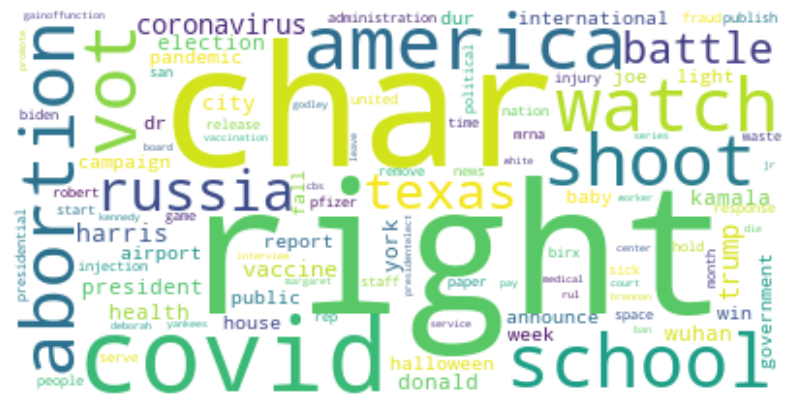

In [72]:
### ======================== Anglais 


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nuage de mots basé sur les scores TF-IDF
wordcloud = WordCloud(background_color='white').generate_from_frequencies(tfidf_df.set_index('term')['score'])

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


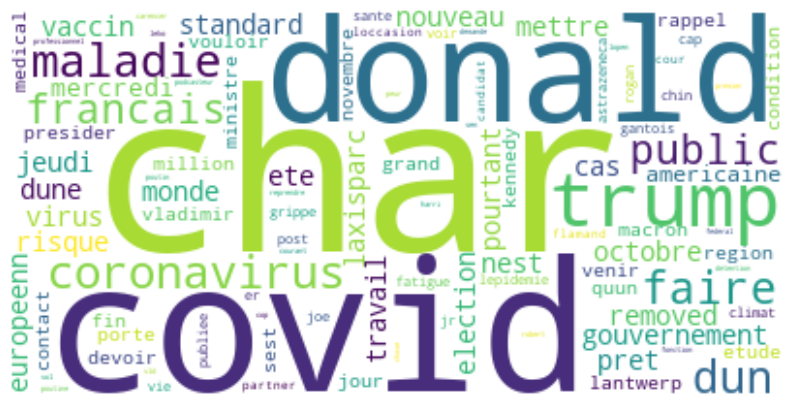

In [73]:
### ======================== Francais

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nuage de mots basé sur les scores TF-IDF
wordcloud = WordCloud(background_color='white').generate_from_frequencies(tfidf_df_fr.set_index('term')['score'])

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## Diagramme de Venn

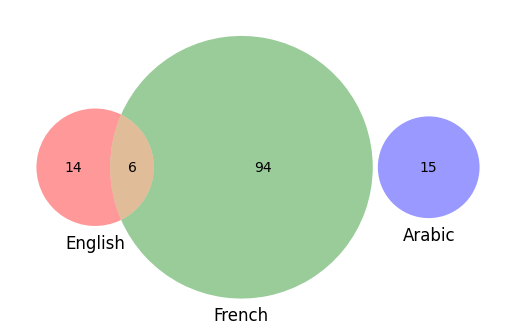

In [79]:
from matplotlib_venn import venn3

# Exemples de termes pour 3 langues
terms_en = set(tfidf_df['term'].head(20))  
terms_fr = set(tfidf_df_fr['term'])  
terms_ar = set([ "فيروس كورونا",  "كوفيد-19", "جائحة", "الوقاية", "الحجر الصحي","لقاح", "الأعراض", "الكمامة", "الإصابة", "المناعة",  "التطعيم",  
                "التباعد الاجتماعي", "العلاج", "الإغلاق", "الفيروس المستجد" ])  

venn3([terms_en, terms_fr, terms_ar], ('English', 'French', 'Arabic'))
plt.show()


## Analyse Finale

In [77]:
import os
import json

# Vérifiez que le répertoire existe, sinon créez-le
output_dir = "../data/descriptors/"
os.makedirs(output_dir, exist_ok=True)

# Chemin complet pour le fichier de sortie
output_file_en = os.path.join(output_dir, 'descriptors_articles_en.json')
output_file_fr = os.path.join(output_dir, 'descriptors_articles_fr.json')

# Enregistrement en JSON
# Convertir le DataFrame en liste de dictionnaires
descriptors_articles_en = tfidf_df.to_dict(orient='records')
descriptors_articles_fr = tfidf_df_fr.to_dict(orient='records')

# Écriture dans un fichier JSON avec un format valide
with open(output_file_en, 'w', encoding='utf-8') as file:
    json.dump(descriptors_articles_en, file, indent=4, ensure_ascii=False)

print(f"Les descripteurs sélectionnés ont été enregistrés dans : {output_file_en}")


# Écriture dans un fichier JSON avec un format valide
with open(output_file_fr, 'w', encoding='utf-8') as file:
    json.dump(descriptors_articles_fr, file, indent=4, ensure_ascii=False)

print(f"Les descripteurs sélectionnés ont été enregistrés dans : {output_file_fr}")


Les descripteurs sélectionnés ont été enregistrés dans : ../data/descriptors/descriptors_articles_en.json
Les descripteurs sélectionnés ont été enregistrés dans : ../data/descriptors/descriptors_articles_fr.json
